In [12]:
import sys
sys.path.append('./')

import random

from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools   #* 用于进行解释变量名称的遍历。
import sys
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import norm

from Analyzation_relative import Data_process as DP

from sklearn.datasets import load_wine

#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

In [16]:
X1 = load_wine()["data"][:, [1, 2]]
X1

array([[1.71, 2.43],
       [1.78, 2.14],
       [2.36, 2.67],
       [1.95, 2.5 ],
       [2.59, 2.87],
       [1.76, 2.45],
       [1.87, 2.45],
       [2.15, 2.61],
       [1.64, 2.17],
       [1.35, 2.27],
       [2.16, 2.3 ],
       [1.48, 2.32],
       [1.73, 2.41],
       [1.73, 2.39],
       [1.87, 2.38],
       [1.81, 2.7 ],
       [1.92, 2.72],
       [1.57, 2.62],
       [1.59, 2.48],
       [3.1 , 2.56],
       [1.63, 2.28],
       [3.8 , 2.65],
       [1.86, 2.36],
       [1.6 , 2.52],
       [1.81, 2.61],
       [2.05, 3.22],
       [1.77, 2.62],
       [1.72, 2.14],
       [1.9 , 2.8 ],
       [1.68, 2.21],
       [1.5 , 2.7 ],
       [1.66, 2.36],
       [1.83, 2.36],
       [1.53, 2.7 ],
       [1.8 , 2.65],
       [1.81, 2.41],
       [1.64, 2.84],
       [1.65, 2.55],
       [1.5 , 2.1 ],
       [3.99, 2.51],
       [1.71, 2.31],
       [3.84, 2.12],
       [1.89, 2.59],
       [3.98, 2.29],
       [1.77, 2.1 ],
       [4.04, 2.44],
       [3.59, 2.28],
       [1.68,

In [18]:
df = pd.read_csv('data/wine/winequality-white-nan.csv' , index_col=0)
# indexlist = list(np.arange(4898))
# for i in range(12):
#     random.shuffle(indexlist)
#     k = random.sample(list(np.arange(30 , 51)) , 1)[0]
#     nan_index = random.sample(indexlist , k)
#     df.iloc[nan_index , i] = pd.NA

In [19]:
indexlist , nan_df = DP.Nan_CountAndPlot(df , plot = False)
df.loc[indexlist]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,NaN,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.4,NaN
15,6.6,0.17,0.38,NaN,0.032,28.0,112.0,0.99140,3.25,0.55,11.4,7.0
28,7.4,NaN,0.48,1.1,0.047,17.0,132.0,0.99140,3.19,0.49,11.6,6.0
31,8.3,0.14,0.34,1.1,NaN,7.0,47.0,0.99340,3.47,0.40,10.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4815,6.2,NaN,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7.0
4820,NaN,0.36,0.50,1.0,0.127,63.0,178.0,NaN,3.10,0.45,9.7,5.0
4826,6.0,0.34,0.29,6.1,NaN,29.0,134.0,0.99462,3.48,0.57,10.7,6.0
4852,6.2,0.23,0.38,1.6,0.044,12.0,113.0,0.99176,NaN,0.73,11.4,5.0


In [20]:
df_withNan , df_pro = DP.Nan_process(df , plot = False , numeric = 'median' , subtype='backward')

In [5]:
df_withNan

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,NaN,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
13,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.4,NaN
15,6.6,0.17,0.38,NaN,0.032,28.0,112.0,0.99140,3.25,0.55,11.4,7.0
28,7.4,NaN,0.48,1.1,0.047,17.0,132.0,0.99140,3.19,0.49,11.6,6.0
31,8.3,0.14,0.34,1.1,NaN,7.0,47.0,0.99340,3.47,0.40,10.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4815,6.2,NaN,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7.0
4820,NaN,0.36,0.50,1.0,0.127,63.0,178.0,NaN,3.10,0.45,9.7,5.0
4826,6.0,0.34,0.29,6.1,NaN,29.0,134.0,0.99462,3.48,0.57,10.7,6.0
4852,6.2,0.23,0.38,1.6,0.044,12.0,113.0,0.99176,NaN,0.73,11.4,5.0


In [28]:
df_1 = df_pro[['total sulfur dioxide' , 'pH']]
df_1.to_numpy()

array([[170.  ,   3.  ],
       [132.  ,   3.3 ],
       [ 97.  ,   3.26],
       ...,
       [111.  ,   2.99],
       [110.  ,   3.34],
       [ 98.  ,   3.26]])

In [7]:
index1 , index2 , processed_df_1 = DP.Outlier_TreatAndPlot(df_1 , dataclass = [0])

In [8]:
index1

Int64Index([ 227,  325,  387,  740, 1417, 1931, 1940, 1942, 2127, 2378, 2654,
            3050, 3094, 3095, 3152, 3710, 3901, 4514, 4745],
           dtype='int64')

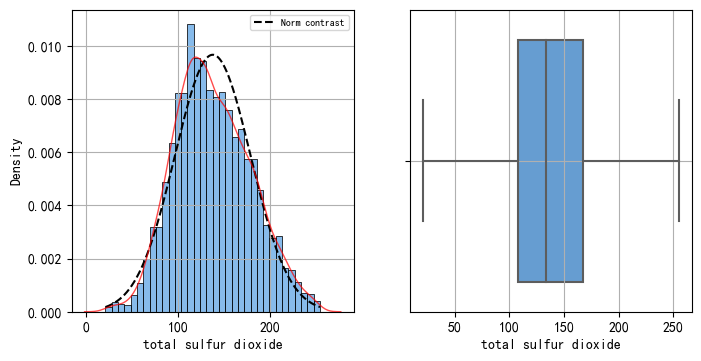

In [10]:
fig , axes = plt.subplots(1 , 2 , figsize = (8 , 4) , dpi = 100)
fig.patch.set_facecolor("white") #* 设置背景 以免保存的图片背景虚化

DS.Numerical_autoplt(processed_df_1.iloc[: ,0] , ax1 = axes[0] , ax2 = axes[1]) # 数值型的两个图